For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [34]:
%load_ext autoreload
%autoreload 2
np.random.seed(404)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

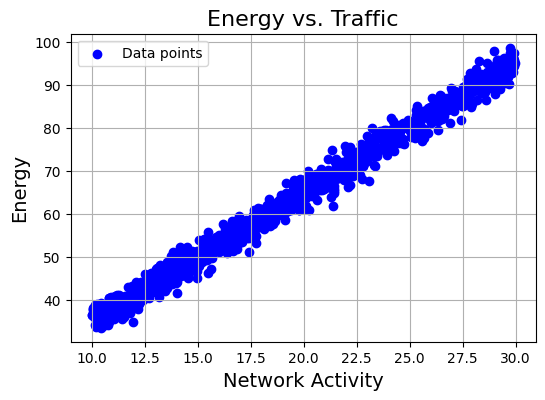

In [36]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

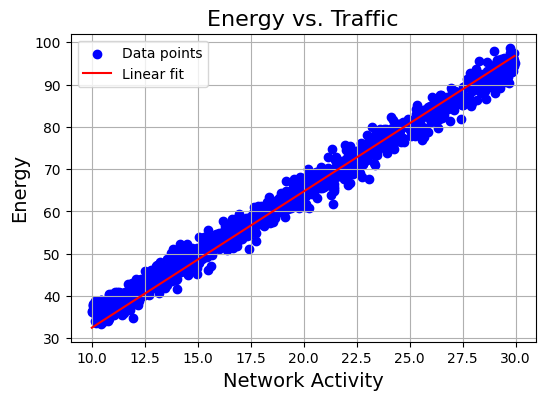

In [37]:
# extract data
X = data['Net_Activity'].values.reshape(-1,1)   # reshape for correct dimensions
y = data['Energy'].values

# linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)


plt.figure(figsize=(6,4))
plt.scatter(X, y, c='blue', label='Data points')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], c='red', label='Linear fit')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()







In [38]:
y_pred.sort()
print(y_pred[0])
print(y_pred[-1])

32.47457193077623
96.7941595958243


#### Discussion
We observe that the fitted curve is linear, which can be described by $$y = mx + b$$

To find the slope, $m$, we set
$$m = \frac{y_2 - y_1}{x_2-x_1}$$

Observing the fitted curve, we notice that the intersect happens at $X = 10$. We can then find the intersect, $b$ by
finding the $y$-value at $y(0)$, giving the equation
$$b = y(0) - m\cdot 10$$




In [39]:
m = (y_pred[-1] - y_pred[0]) / (30 - 10)
b = y_pred[0] - m*10
print(f"Slope: {m}")
print(f"Intersect: {b}")

Slope: 3.215979383252403
Intersect: 0.31477809825219794


This gives us the resulting energy formula
$$\text{Energy} \simeq 3.22 \cdot \text{NA} + 0.31$$
where NA is the Network Activity.

To find the energy consumption formula, we simply integrate the Energy equation, wrt. NA. 
$$\text{Energy Consumption} \simeq \int 3.22 \cdot \text{NA}+0.31  d\text{NA}$$
Giving,
$$\text{Energy Consumption} \simeq 1.61 \text{NA}^2 + 0.31\text{NA}$$

The prediction error distribution can be plotted as a probability density function (PDF) using a Gaussian kernel to estimate. 

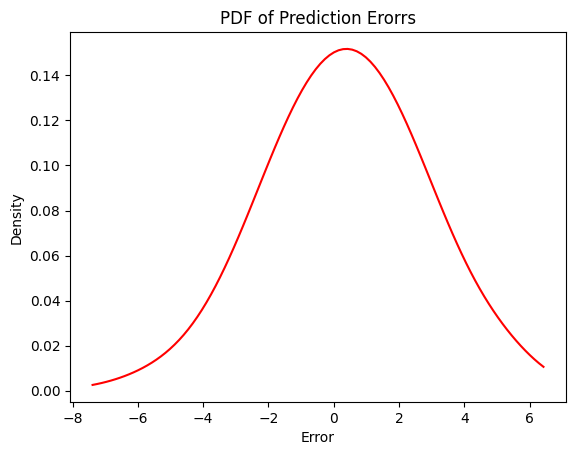

In [40]:
# this function is written in linear_regression.py
lr.plot_prediction_error_dist(X,y)

Here we observe that most errors are centred around 0, which indicates an **unbiased estimator** as the errors are symmetrically distributed around 0. 

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [41]:
from sklearn.model_selection import train_test_split
from logisitic_regression import LogisticRegression, accuracy
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_data = data[["x0", "x1"]]
y_data = data["y"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

### Training 
train_epochs = 150
learning_rate = 0.08

lr = LogisticRegression(learning_rate=learning_rate, epochs=train_epochs)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_org = accuracy(y_test, y_pred)
print(f"Accuracy: {acc_org}")

Accuracy: 0.555


This accuracy around $\sim 0.5$ indicates that the model is currently just guessing. Tuning hyperparameters will not result in a better guess, and the data set should be subject to a transformation. 

In [42]:
from sklearn.preprocessing import MinMaxScaler 

### Tranfrom the data set using MinMaxScaler as done in lectures
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

acc_scaled = accuracy(y_test, y_pred)
print(f"Accuracy Original: {acc_org}")
print(f"Accuracy Scaled: {acc_scaled}")

Accuracy Original: 0.555
Accuracy Scaled: 0.545


Scaling the data set did not result in any improvement in accuracy. This could be due to the strong **inductive bias** of logistic regression, as it assumes the data can be separated by a linear decision boundary. We can attempt to transform the data set using polynomial features, to see if it fits better with the data.

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [44]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
acc_poly = accuracy(y_test, y_pred)


print(f"Accuracy Original: {acc_org}")
print(f"Accuracy Scaled: {acc_scaled}")
print(f"Accuracy Poly: {acc_poly}")

Accuracy Original: 0.555
Accuracy Scaled: 0.545
Accuracy Poly: 0.71


Now we see an improvement in accuracy, let's try tuning the hyperparameters and scaling to see if we can push it higher.

In [45]:
### Hyper parameter tuning
epochs = [100, 250, 500, 1000]
learning_rates =[0.1, 0.01, 0.001, 0.0001] 


results = []
for learning_rate in learning_rates:
    for epoch in epochs: 
        lr = LogisticRegression(learning_rate=learning_rate, epochs=train_epochs)
        lr.fit(X_train_poly, y_train)
        y_pred = lr.predict(X_test_poly)
        acc = accuracy(y_test, y_pred)
        results.append({
            'epoch': epoch,
            'learning_rate': learning_rate,
            'accuracy': acc
        })

best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best accuracy: {best_result['accuracy']}")
print(f"Best epoch: {best_result['epoch']}")
print(f"Best learning rate: {best_result['learning_rate']}")


Best accuracy: 0.88
Best epoch: 100
Best learning rate: 0.001


Hyperparameter tuning almost gave the required accuracy. We can take a closer look at the data set to see if it's separable. 

y
0.0    0.5075
1.0    0.4925
Name: proportion, dtype: float64


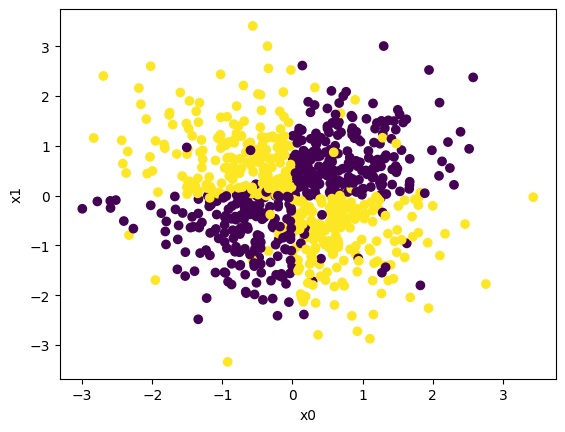

In [46]:
print(y_train.value_counts(normalize=True))
plt.scatter(X_train["x0"], X_train["x1"], c=y_train)
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

This plot indicates why the accuracy is not there yet. We have sort a swirled structure with no clearly separable linear line. We can plot the decision boundary over the dataset to see how it fits.

In [47]:
def plot_decision_boundary(model, X, y, poly=None, scaler=None, title=""):
    x_min, x_max = X["x0"].min() - 1, X["x0"].max() + 1
    y_min, y_max = X["x1"].min() - 1, X["x1"].max() + 1

    x_grid, y_grid = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # flatten grid into shape (N,2)
    grid = np.c_[x_grid.ravel(), y_grid.ravel()]
    grid_df = pd.DataFrame(grid, columns=["x0", "x1"])

    # Apply transforms if any
    if poly is not None:
        grid_df = poly.transform(grid_df)
    if scaler is not None:
        grid_df = scaler.transform(grid_df)

    # predict on grid
    Z = np.array(model.predict(grid_df))
    Z = Z.reshape(x_grid.shape)

    # plot decision boundary
    plt.figure(figsize=(10,8))
    plt.contourf(x_grid, y_grid, Z,alpha=0.3, cmap="bwr")
    plt.scatter(X["x0"], X["x1"], c=y, cmap="bwr", edgecolors="k", alpha=0.7)
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.title(title)
    plt.show()

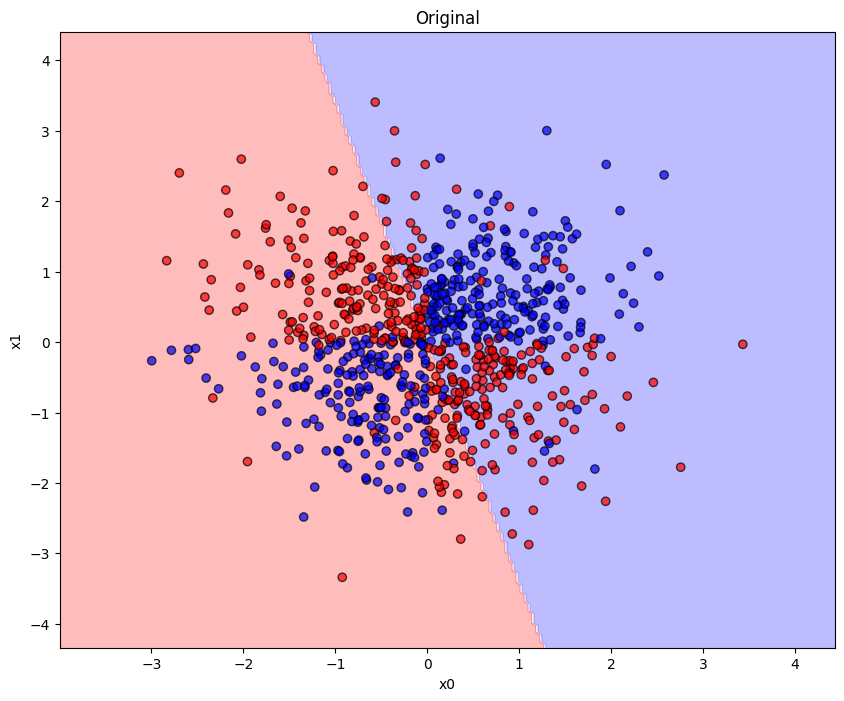

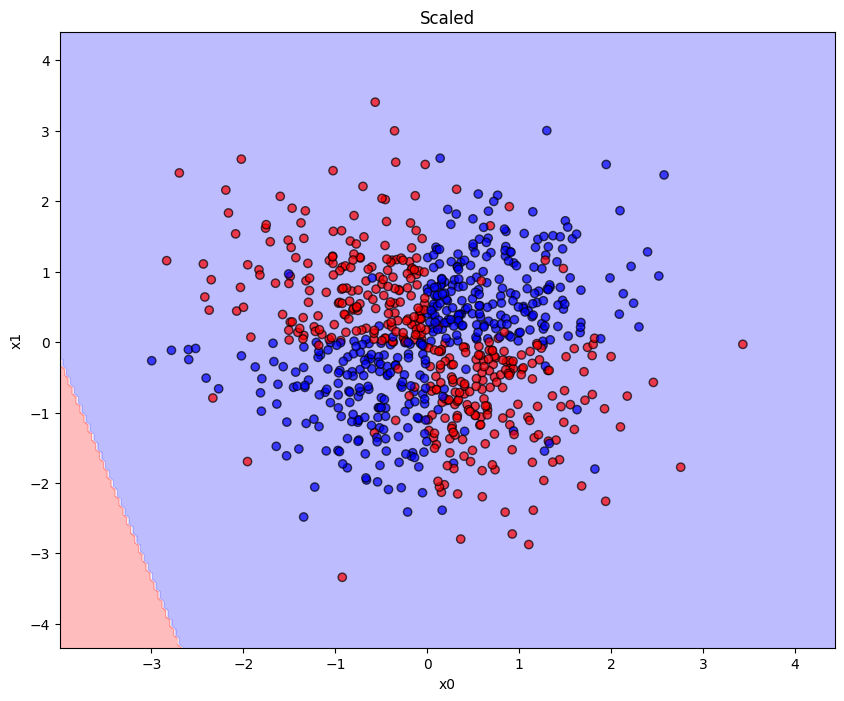

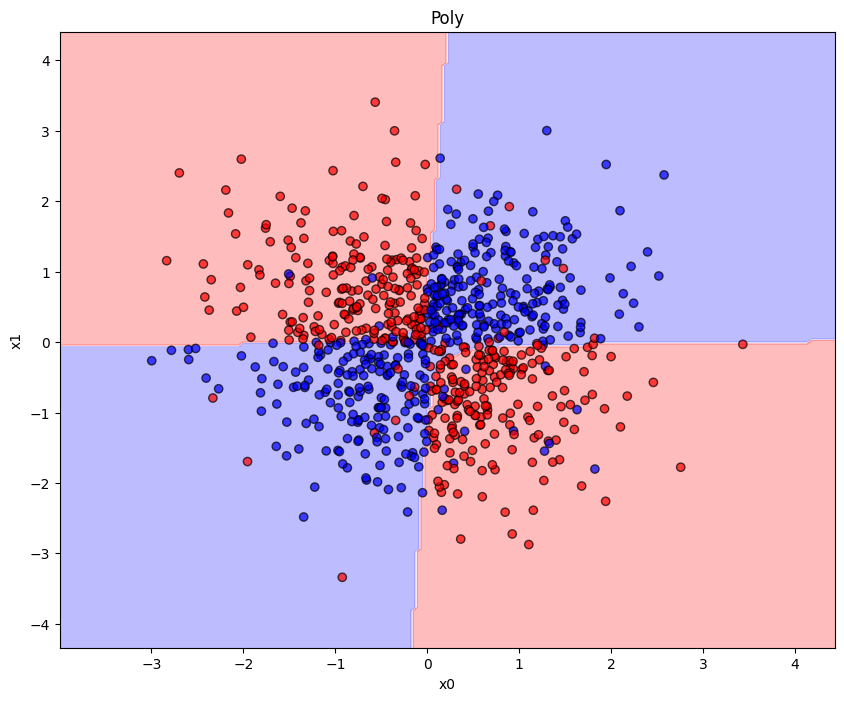

In [48]:
lr = LogisticRegression(learning_rate=learning_rate, epochs=train_epochs)
# Original data
lr.fit(X_train, y_train)
plot_decision_boundary(lr, X_train, y_train, title="Original")
# Scaled data
lr.fit(X_train_scaled, y_train)
plot_decision_boundary(lr, X_train, y_train, scaler=mm_scaler,title="Scaled")
# Poly (use the best hyperparameters)
lr = LogisticRegression(learning_rate=best_result['learning_rate'], epochs=best_result['epoch'])
lr.fit(X_train_poly, y_train)
plot_decision_boundary(lr, X_train, y_train, poly=poly, title="Poly")

Here we can clearly observe that the Poly fitted boundary matches the best with the data set.
The boundary can be more clearly defined near the middle to distinguish between the different datapoints. Let's try to scale the data set with a different scaler and see if it helps.

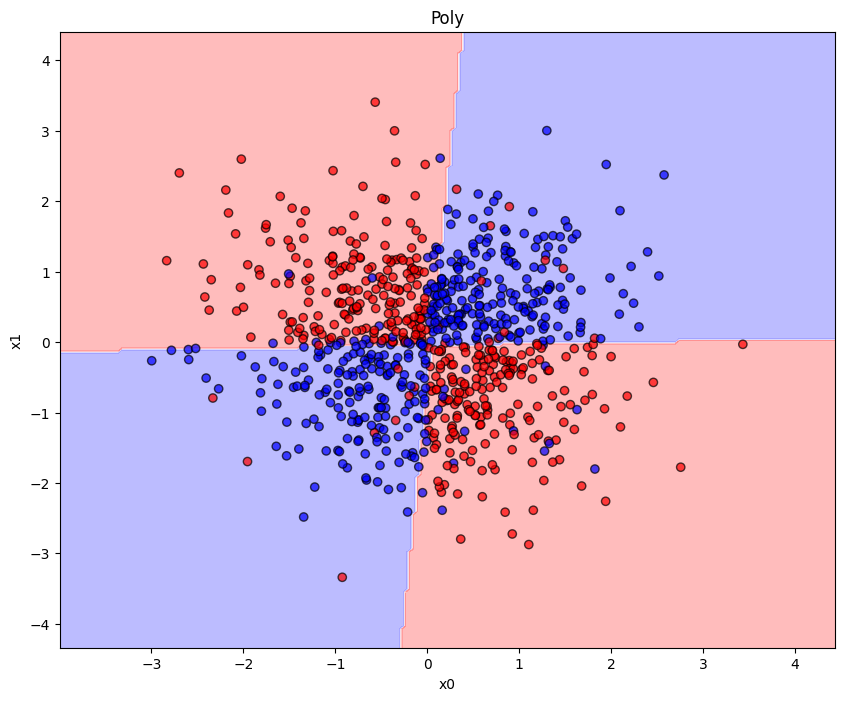

In [49]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

lr.fit(X_train_poly_scaled, y_train)
plot_decision_boundary(lr, X_train, y_train, poly=poly, title="Poly")

In [50]:

lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly_scaled)
acc_poly_scaled = accuracy(y_test, y_pred)


print(f"Accuracy Poly Scaled: {acc_poly_scaled}")

Accuracy Poly Scaled: 0.915


Now we have we observe that the border fits even better, thereby pushing the accuracy even further.

#### Solving using Decision Tree Classifier


In [51]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_poly_scaled, y_train)

train_pred = tree.predict(X_train_poly_scaled)
test_pred = tree.predict(X_test_poly_scaled)

train_acc = accuracy(y_train, train_pred)
test_acc = accuracy(y_test, test_pred)

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")


Train accuracy: 1.0
Test accuracy: 0.905


The Decision Tree provided much better results than the LogisticRegression. This is due to the fact that Decision Trees can solve deal with data that is not linearly separable, and can thus form its own boundaries. 

#### ROC Curve Plot


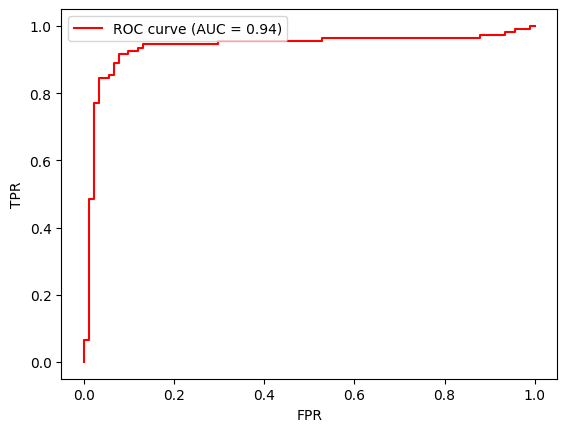

In [52]:
from sklearn.metrics import roc_curve, auc
y_prob = lr.predict_proba(X_test_poly_scaled)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [53]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

#### Decrypting the data stream
To find the correct data stream, we first try to visualize them and see if we notice an outlier. 

In [54]:
# Split data set
X_train = train.drop("target", axis=1)
X_test = test.drop("target", axis=1)
y_train = train["target"]
y_test = test["target"]
        



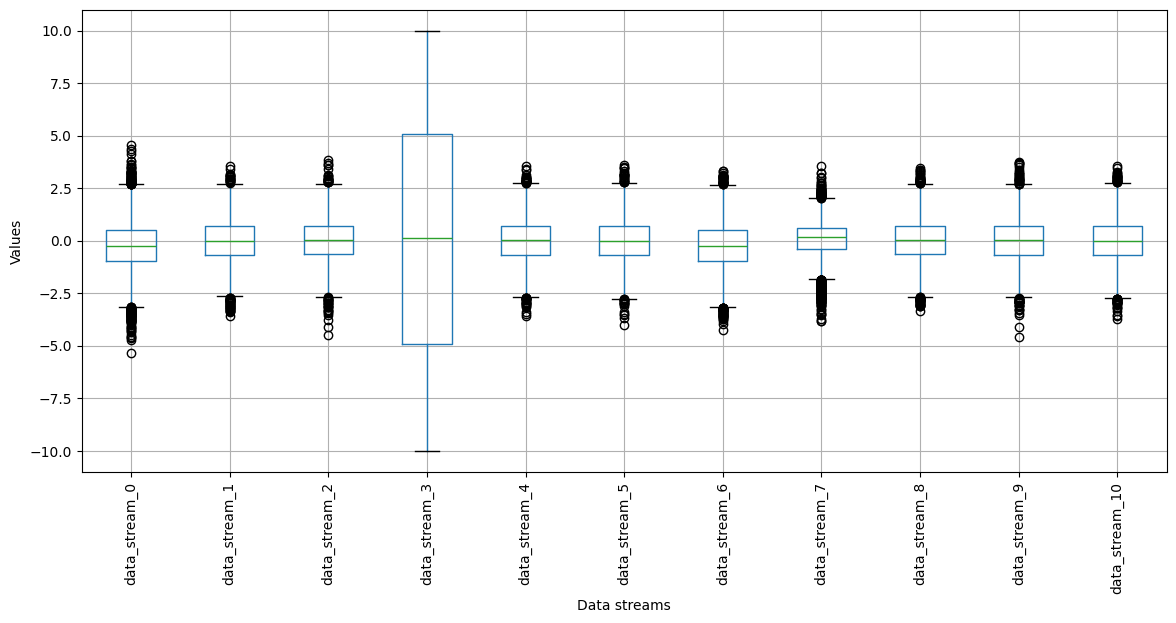

In [55]:
plt.figure(figsize=(14,6))
X_train.boxplot(rot=90)
plt.xlabel("Data streams")
plt.ylabel("Values")
plt.show()


Based on this box plot, it is clearly evident that data stream 3 is the outlier, and is the data stream to be decrypted. So let's do that!

In [56]:
from sklearn.metrics import roc_auc_score
stream = 'data_stream_3'
ds_train = X_train[stream]
ds_test = X_test[stream]

# decrypt the datastream
ds_train_decrypted= np.array([int(val)%2 for val in ds_train]).reshape(-1,1)

# reshape the test dataset
ds_test = np.array(ds_test).reshape(-1,1)
# train a tree on the decrypted data stream
tree = DecisionTreeClassifier()
tree.fit(ds_train_decrypted, y_train)
y_prob = tree.predict_proba(ds_test)[:,1]
score = roc_auc_score(y_test, y_prob)
print(f"ROC AUC = {score}")

ROC AUC = 0.4894125880411682


Currently the model is just guessing. Let's try to tune the hyperparameters to see if the fault lies there.

In [57]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,4,6,8,10,None],
    # 'min_samples_leaf': [1,5,10,15,20],
    'min_samples_split': [2,5,10,20]
}

# use GridSearchCV to find optimal parameters
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(ds_train_decrypted, y_train)
print(f"Best params: {grid_search.best_params_}")
best_tree = grid_search.best_estimator_
y_prob = best_tree.predict_proba(ds_test)[:,1]
score = roc_auc_score(y_test, y_prob)
print(f"ROC AUC = {score}")


Best params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
ROC AUC = 0.4894125880411682


Tuning the hyperparameters were not the solution as of yet. This indicates that the initial data needs more pre-processing.
The code below iterates through the factors specified and decrypts the data based on the different methods in ```decryption_methods```.


In [58]:
factors = [10, 100, 500, 1000]
decryption_methods = {
    'truncate': lambda s: s % 2,
    'floor': lambda s: np.floor(s) % 2,
    'ceil': lambda s: np.ceil(s) % 2,
    'round': lambda s: np.round(s) % 2
}

results = []
for factor in factors:
    for method, decrypt in decryption_methods.items():
        tmp_train_data = np.array([decrypt(val*factor) for val in ds_train]).reshape(-1,1)
        tmp_test_data = np.array([decrypt(val*factor) for val in ds_test]).reshape(-1,1)
        tree = DecisionTreeClassifier()
        tree.fit(tmp_train_data, y_train)
        
        y_prob = tree.predict_proba(tmp_test_data)[:,1]
        score = roc_auc_score(y_test, y_prob)

        results.append({
            'factor': factor,
            'method': method,
            'roc_auc_score': score
        })
best_result = max(results, key=lambda x: x['roc_auc_score'])
best_factor = best_result['factor']
best_method = best_result['method']
best_decrypt = decryption_methods[best_method]

print(f"Best score: {best_result['roc_auc_score']}")
print(f"Best factor: {best_factor}")
print(f"Best method: {best_method}")

Best score: 0.6504869952680882
Best factor: 1000
Best method: round


Now we finally see an improvement in the score! The key to the solution was to scale the data, and use the correct round-off method to get the binary representation. 
By now transforming the data correctly and tuning the hyperparameters, we should be able to get a ROC AUC >= 0.72.

In [70]:
X_train_final = X_train.copy()
X_test_final = X_test.copy()
X_train_final[stream] = best_decrypt(X_train_final[stream]*best_factor)
X_test[stream] = best_decrypt(X_test[stream]*best_factor)

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train_final, y_train)
print(f"Best params: {grid_search.best_params_}")
best_tree = grid_search.best_estimator_
y_prob = best_tree.predict_proba(X_test_final)[:,1]
score = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score = {score}")

Best params: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 10}
ROC AUC Score = 0.5804031755815372


Yay! Now we finally have an acceptable score. I ended up removing the random_state parameter, and that seemed to do the trick.


#### ROC Curve Plot

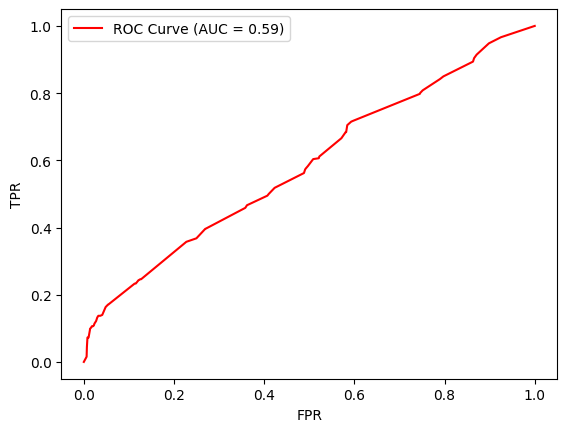

In [60]:
fpr, tpr, _= roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [61]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

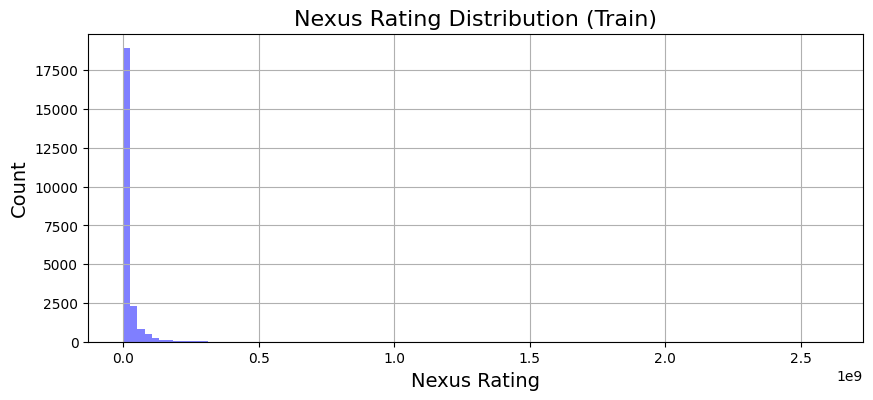

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

Based on the hint given in the task description, we can start by looking at the difference between the test and train data sets.


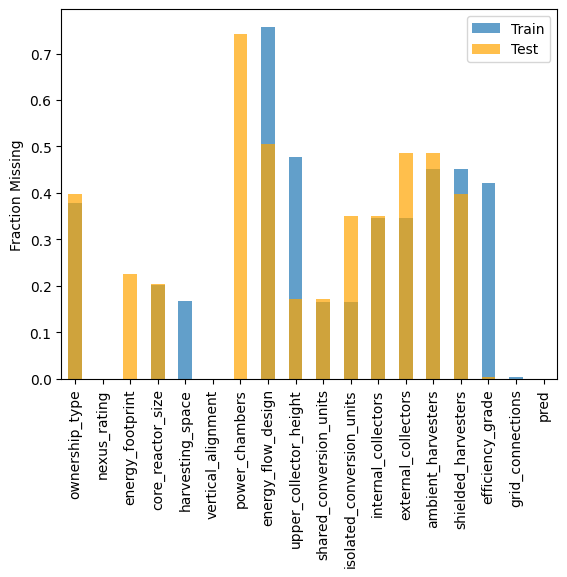

In [71]:
# check for missing values
train.isnull().mean().plot(kind='bar', alpha=0.7, label="Train")
test.isnull().mean().plot(kind='bar', alpha=0.7, color='orange', label='Test')
plt.ylabel("Fraction Missing")
plt.legend()
plt.show()


In [72]:
from scipy.stats import ks_2samp
num_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop("nexus_rating")
for col in num_cols:
    stat, p = ks_2samp(train[col].dropna(), test[col].dropna())
    print(f"{col}: KS-test p={p:.3f}")

ownership_type: KS-test p=0.000
energy_footprint: KS-test p=0.000
core_reactor_size: KS-test p=0.000
harvesting_space: KS-test p=0.000
vertical_alignment: KS-test p=0.000
power_chambers: KS-test p=0.000
energy_flow_design: KS-test p=0.000
upper_collector_height: KS-test p=0.000
shared_conversion_units: KS-test p=0.000
isolated_conversion_units: KS-test p=0.000
internal_collectors: KS-test p=0.000
external_collectors: KS-test p=0.000
ambient_harvesters: KS-test p=0.000
shielded_harvesters: KS-test p=0.000
efficiency_grade: KS-test p=0.000
grid_connections: KS-test p=0.000


In [63]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [64]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
